<div style="background-color: #212946; padding: 10px; color: #F62196; text-align: center;">

<b>*Codeup Project*</b>
***
</div>

<div style="background-color: #212946; padding: 10px; text-align: center; color: #18C0C4;">


<br>
<br>
<br>
<br>

# **Project Telcoco** 
<br>
<br>

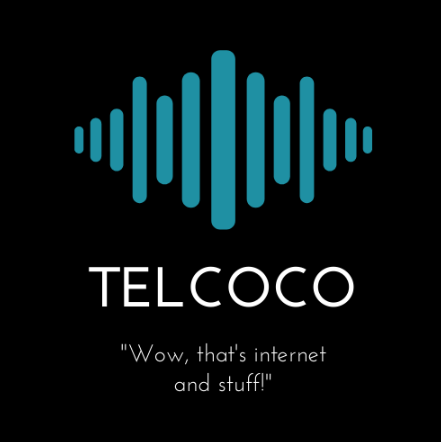 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

</div>

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

## **Goals**

* Discover drivers of churn of Telco customers

* Use drivers to develop a machine learning models to identify drivers of churn

* Churn as a customer ending their contract or not renewing their contract with Telco

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## **Imports**

```python
import warnings
warnings.filterwarnings("ignore")

import prepare as p
import explore as e
import model as m
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
```

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## **Acquire**

* Data pulled from Codeup MySQL Database

* Data initially exported on 21 August 2023 as a csv

* DataFrame contained 7,043 rows and 21 columns before any manipulation

* Each row represents a unique customer of Telco

* Each column represents one of 21 elements of the customer account

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## **Prepare**

- Drop the joiner `_id` columns from SQL

- Fill `Null` in `internet_service_type` with what the rest of the table uses, `No internet service`

- Nine `Null` in `total_charges` after `pd.to_numeric()` also have 0 tenure. We'll assume they're new and haven't been charged

- Automatic payments could be important for churn, so we make it's own column `automatic_payments`

- Change `senior_citizen` to Yes / No for better visuals

- Change `tenure` to `tenure_months`

- Create `tenure_years` by dividing `tenure_months` by 12 and rounding down

- Create `total_add_ons` that counts all of the add ons (value 1 - 6)

- Rename some columns for clarity `partner` to `married` and `dependents` to `kids` (confirmed some married and dependents 0)

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">


## **Explore**

---

### **1. Is `churn` independent from `paperless_billing`?**

* $H_0$: `churn` is independent from `paperless_billing`

* $H_a$: `churn` is **NOT** independent from `paperless_billing`

In [6]:
## Graph

* Discrete (`churn`) vs Discrete (`paperless_billing`) = $Chi^2$
    - $Chi^2$ = 
    - $p$ = 
<br>

<u><b>We reject the null hypothesis.</b></u> 

*There is strong evidence to support the idea that `churn` is not independent from `paperless_billing`*
- *Those enrolled in `paperless_billing` appear to churn twice as much as those who aren't.*

---

### **2. Is `churn` independent from `payment_type`?**

* $H_0$: `churn` is independent from `payment_type`

* $H_a$: `churn` is **NOT** independent from `payment_type`

In [7]:
## GRAPH

* Discrete (`churn`) vs Discrete (`payment_type`) = $Chi^2$
    - $Chi^2$ = 
    - $p$ = 
<br>

<u><b>We reject the null hypothesis.</b></u> 

*There is strong evidence to support the idea that `churn` is not independent from `payment_type`*
- *`Electronic_check` payment being the most common among churn*

---

### **3. Is there a difference in `churn` based on `internet_service_types`?**

* $H_0$: `churn` is independent from `internet_service_type`

* $H_a$: `churn` is **NOT** independent from `internet_service_type`

In [9]:
## GRAPH

* Discrete (`churn`) vs Discrete (`internet_service_type`) = $Chi^2$
    - $Chi^2$ = 
    - $p$ = 
<br>

<u><b>We reject the null hypothesis.</b></u>

*There is strong evidence to support the idea that `churn` is not independent from `internet_service_type`*
- *`Fiber_optic_internet` being the most common among churn*

---

### **4. Is `churn` independent from `monthly_charges`?**

* $H_0$: There is **NO** difference in `churn` based on `monthly_charges`

* $H_a$: There is a difference in `churn` based on `monthly_charges`

In [11]:
## GRAPH

* Discrete (`churn`) vs Continuous (`monthly_charges`) = $Mann$-$Whitney$ $U$
    - $Mann$-$Whitney$ $U$ statistic = 
    - $p$ = 
<br>

<u><b>We reject the null hypothesis.</b></u>

*There is strong evidence to support the idea that `churn` is not independent from `monthly_charges`*
 - *Higher average monthly charges amongst churn*

---

### **5. Is `gender` independent from `internet_service_type`?**

* $H_0$: There is **NO** difference in `churn` based on `gender`

* $H_a$: There is a difference in `churn` based on `gender`

In [ ]:
### GRAPH

* Discrete (`churn`) vs Discrete (`gender`) = $Chi^2$
    - $Chi^2$ = 
    - $p$ = 
<br>

<u><b>We reject the null hypothesis.</b></u>

*There is strong evidence to support the idea that `churn` is not independent from `monthly_charges`*
 - *Higher average monthly charges amongst churn*

---

### **6. Is `churn` independent from `tech_support`?**

* $H_0$: There is **NO** difference in `churn` based on `tech_support`

* $H_a$: There is a difference in `churn` based on `tech_support`

In [12]:
## Graph

* Discrete (`churn`) vs Discrete (`tech_support?`) = $Chi^2$
    - $Chi^2$ = 
    - $p$ = 
<br>

<u><b>We reject the null hypothesis.</b></u>

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## **Modeling**

* Accuracy will be the evaluation metric (*Given more time, other metrics could be evaluated and more hyperparamters tested*)
<pre>
        <u>     TP + TN     </u>
        TP + TN + FP + FN
</pre>




* Guessing `no_churn` for every customer gives an accuracy of 73%
    - 73% will be the baseline accuracy

* Target feature is `churn`
    - 27% `churn`
    - 73% `no_churn`

* Models will be developed and evaluated using 4 different model types, various features, and various hyperparameter configurations
    - Decision Tree
    - Random Forest
    - K-Nearest Neighbor
    - Logistic Regression

* Models will be evaluated on train and validate datasets



* Best performing model will be the only one evaluated on the test dataset

In [ ]:
### BASELINE GRAPH

### 1. Model Type 1

### 2. Model Type 1 on Test Set (Best Perfoming Model on Test Split)

### 3. Model 3

### 4. Model 4

### 5. Model 5

### Modeling Takeaways

* Decision Tree, Random Forest, and KNN had between 2.5-4% difference for train and validate

* Logistic Regression had about 1% difference for train and validate, best overall

* With the test done on Logistic Regression, we get an 80.7% accuracy

    - 80.7% is higher than our baseline of 73.47%

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## **Conclusion**

### **Takeaways and Key Findings**

- Payment type was found to be a driver of churn

  - Electronic check being the most common among churn

- Fiber optic internet being a driver of churn was surprising considering it has faster internet speeds

  - Perhaps a competitor is offering it cheaper

- Paperless billing was found to be a driver of churn

  - Having it enabled was the most common among churn

- Monthly charges was found to be a driver of churn, higher charges for churn

### **Recommendations**

- Check with the finance department to figure out if there are issues with electronic check.

- Check with internet department to see if there are frequent issues with fiber optic internet.

- Possibly offer tech support for free or cheaper. People without it tend to leave.

### **Next Steps**

- Given more time I could check what is causing the high monthly charges that lead to customers churning